In [244]:
import pandas as pd

In [245]:
data = pd.read_csv("/content/hepatitis_csv.csv")

In [246]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [247]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [248]:
data['sex'] = data.sex.map({"female" : 1,"male": 0})

In [189]:
#data['class'] = data['class'].map({"live" : 1,"die": 0})

In [249]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [250]:
df_missing = data.isnull().sum().sort_values(ascending=False) /((len(data)))

In [251]:
df_missing

protime            0.432258
alk_phosphate      0.187097
albumin            0.103226
liver_firm         0.070968
liver_big          0.064516
bilirubin          0.038710
spleen_palpable    0.032258
varices            0.032258
ascites            0.032258
spiders            0.032258
sgot               0.025806
steroid            0.006452
anorexia           0.006452
malaise            0.006452
fatigue            0.006452
sex                0.000000
class              0.000000
antivirals         0.000000
histology          0.000000
age                0.000000
dtype: float64

In [252]:
data.drop("protime", axis = 1, inplace=True)
data.shape

(155, 19)

In [253]:
data['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

In [254]:
live = round(data['class'].value_counts()[0]/len(data) * 100, 2)

death = round(data['class'].value_counts()[1]/len(data) * 100, 2)

print('alive : {} % of the dataset'.format(live))
print('death : {} % of the dataset'.format(death))

alive : 79.35 % of the dataset
death : 20.65 % of the dataset


Here our dataset is not perfectly balanced, it does not suffer from high class imbalance.

In [211]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]



In [212]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,False,die
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,36,female,True,False,False,False,False,True,False,False,False,False,False,0.6,120.0,30.0,4.0,True,live
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [255]:
data.corr()

,age,sex,antivirals,bilirubin,alk_phosphate,sgot,albumin,histology
age,1.000000,-0.008126,0.013100,0.125463,0.008924,0.082545,-0.262981,0.170780
sex,-0.008126,1.000000,-0.089249,0.056349,-0.074243,0.017652,-0.005828,0.137450
antivirals,0.013100,-0.089249,1.000000,-0.185023,-0.205236,-0.108138,0.170074,-0.209242
bilirubin,0.125463,0.056349,-0.185023,1.000000,0.220062,0.232967,-0.377318,0.262428
alk_phosphate,0.008924,-0.074243,-0.205236,0.220062,1.000000,0.239581,-0.403857,0.284914
sgot,0.082545,0.017652,-0.108138,0.232967,0.239581,1.000000,-0.136276,0.131125
albumin,-0.262981,-0.005828,0.170074,-0.377318,-0.403857,-0.136276,1.000000,-0.324751
histology,0.170780,0.137450,-0.209242,0.262428,0.284914,0.131125,-0.324751,1.000000


In [256]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,0,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,1,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,1,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,1,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,1,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,True,die
151,44,1,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,1,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,0,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [257]:

numerical_variables = ['age', 'bilirubin', 'albumin', 'alk_phosphate', 'sgot']
data[numerical_variables].describe()

,age,bilirubin,albumin,alk_phosphate,sgot
count,155.000000,149.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,3.817266,105.325397,85.89404
std,12.565878,1.212149,0.651523,51.508109,89.65089
min,7.000000,0.300000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,4.200000,132.250000,100.50000
max,78.000000,8.000000,6.400000,295.000000,648.00000


in the table that the patients belong to an 
age of 7-78 years, with a mean of 41.2 and a median of 39. 
it is interesting to note that they display 
a moderate variance; the range goes from 0.6 (BILIRUBIN) to 38.35 (ALK_PHOSPHATE). Also,
the variables SGOT and ALK_PHOSPATE show a high standard deviation and 
their distribution could be right skewed due to the fact that the mean 
is higher than the median. 

In [258]:
categorical_variables = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology']
data[categorical_variables].apply(pd.Series.value_counts)


,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0,16,76,131,54,93,122,25,84,120,99,130,132,85
False,16,76,131,54,93,122,25,84,120,99,130,132,85
1,139,78,24,100,61,32,120,60,30,51,20,18,70
True,139,78,24,100,61,32,120,60,30,51,20,18,70


Here level 0 in the variable SEX which means that the dataset include more female than male patients. Likewise, the variables ANTIVIRALS, ANOREXIA, ASCITES and VARICES include much more observations in the 0 than in the 1. This could point out that these features are present in the patients and could be interesting variables influencing their survival.

In [259]:

df= data.dropna()
values = ['anorexia', 'albumin','alk_phosphate', 'bilirubin', 'ascites','sgot',"varices","antivirals", 'class']
df = df[values]
df.head()

,anorexia,albumin,alk_phosphate,bilirubin,ascites,sgot,varices,antivirals,class
0,False,4.0,85.0,1.0,False,18.0,False,False,live
1,False,3.5,135.0,0.9,False,42.0,False,False,live
2,False,4.0,96.0,0.7,False,32.0,False,False,live
5,False,4.0,95.0,0.9,False,28.0,False,False,live
10,False,4.4,78.0,1.3,False,30.0,False,True,live


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


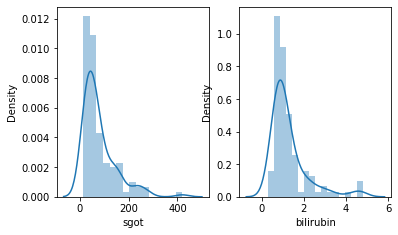

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(df['sgot'])

plt.subplot(1, 2, 2)
sns.distplot(df['bilirubin'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


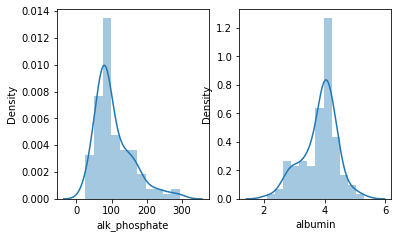

In [261]:

plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(df['alk_phosphate'])

plt.subplot(1, 2, 2)
sns.distplot(df['albumin'])

ALK_PHOSPHATE and SGOT thatshow a degree of skeweness. In order to fix that, we will use some transformation to the variables

In [262]:
df[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = df[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] .applymap(np.log)
df.head()

,anorexia,albumin,alk_phosphate,bilirubin,ascites,sgot,varices,antivirals,class
0,False,1.386294,4.442651,0.000000,False,2.890372,False,False,live
1,False,1.252763,4.905275,-0.105361,False,3.737670,False,False,live
2,False,1.386294,4.564348,-0.356675,False,3.465736,False,False,live
5,False,1.386294,4.553877,-0.105361,False,3.332205,False,False,live
10,False,1.481605,4.356709,0.262364,False,3.401197,False,True,live


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


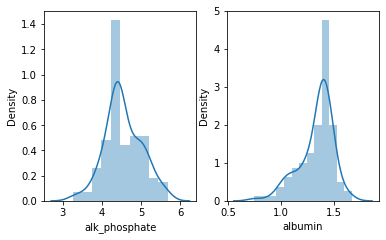

In [263]:

plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(df['alk_phosphate'])

plt.subplot(1, 2, 2)
sns.distplot(df['albumin'])

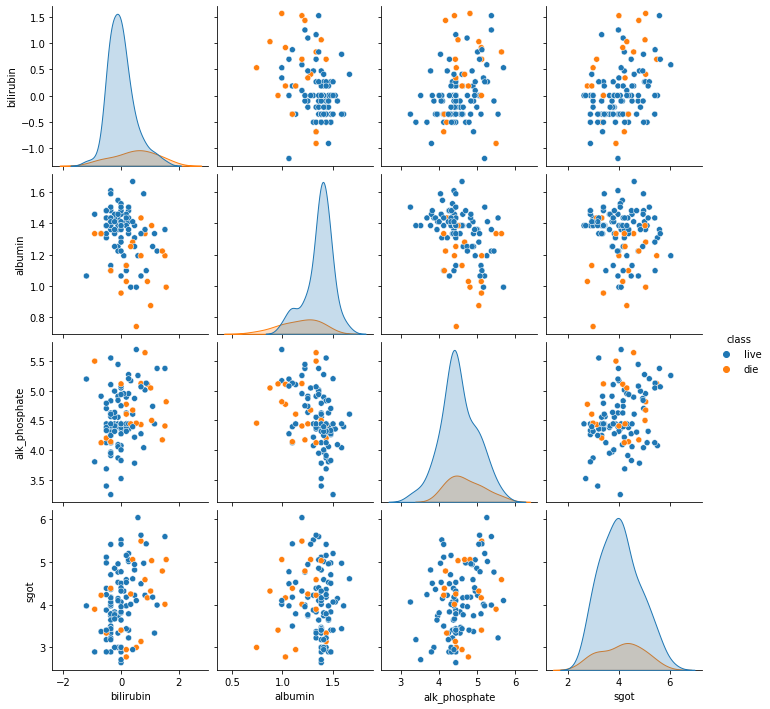

In [264]:
sns.pairplot(df, x_vars = ['bilirubin', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'albumin', 'alk_phosphate', 'sgot'],hue = 'class', kind= 'scatter')
               


There is not a linear relationship between the variables plotted

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; y

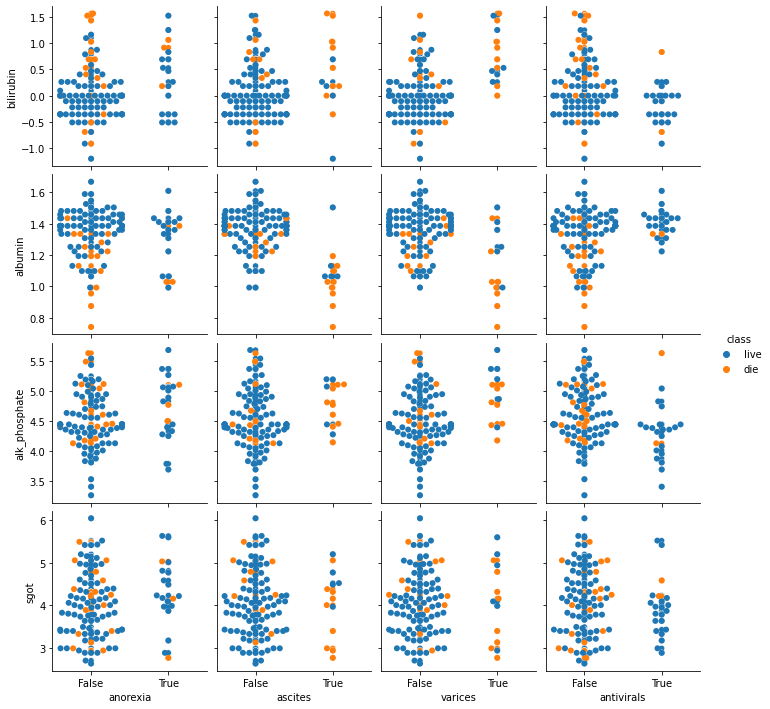

In [265]:
plt = sns.pairplot(df,x_vars=["anorexia", "ascites","varices","antivirals"],
                 y_vars=['bilirubin', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
plt.map(sns.swarmplot, s = 6)


we can see a trend that patients with Class 0 tend to have ascites. However, there is no differences in how the variables are expressed regarding ASCITES


In [227]:
corr = data.dropna().corr(method = 'pearson')

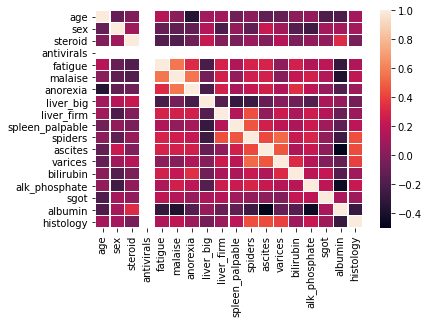

In [266]:
sns.heatmap(corr, linewidths=.2, xticklabels=True, yticklabels=True);

variables show a coefficient of 0.6 or -0.4, but most of them display a very low correlation coefficient.

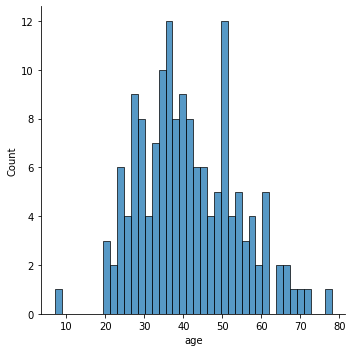

In [267]:

sns.displot(data.age, bins=40)

This shows that most of the people in the dataset have age between 25-50 with maximum people having age = 36-38 and 50-55. Only a few people with age<=30 and age>=62 suffer from Hepatitis

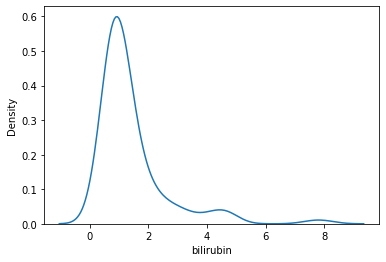

In [268]:
sns.kdeplot(data.bilirubin)

All these plots indicate that people with lower bilirubin (values between 0-2) are more prone to Hepatitis

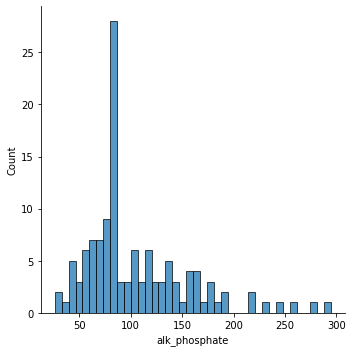

In [269]:

sns.displot(data.alk_phosphate, bins=40)


Maximum people have alkaline phosphate value of 80-100

In [270]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,0,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,1,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,1,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,1,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,1,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,True,die
151,44,1,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,1,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,0,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [275]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.dropna()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['steroid'] = label_encoder.fit_transform(data['steroid'])
data['antivirals'] = label_encoder.fit_transform(data['antivirals'])
data['fatigue'] = label_encoder.fit_transform(data['fatigue'])
data['malaise'] = label_encoder.fit_transform(data['malaise'])
data['anorexia'] = label_encoder.fit_transform(data['anorexia'])
data['liver_big'] = label_encoder.fit_transform(data['liver_big'])
data['liver_firm'] = label_encoder.fit_transform(data['liver_firm'])
data['spleen_palpable'] = label_encoder.fit_transform(data['spleen_palpable'])
data['varices'] = label_encoder.fit_transform(data['varices'])
data['histology'] = label_encoder.fit_transform(data['histology'])
data['ascites'] = label_encoder.fit_transform(data['ascites'])
data['spiders'] = label_encoder.fit_transform(data['spiders'])

In [277]:
from sklearn.feature_selection import chi2

In [286]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'histology',
       'class'],
      dtype='object')

In [287]:
X = data.drop(columns = ['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'class'],axis=1)
y = data['class']

In [288]:
chi_scores = chi2(X,y)

In [289]:
chi_scores

(array([28.47481919,  0.47914839,  1.55614837,  2.2205708 ,  4.78488164,
         9.67625258,  1.59496055,  1.13258566,  2.74353373,  5.03112297,
        13.01905904, 19.56639566, 31.45454714,  9.70247169]),
 array([9.49250625e-08, 4.88808315e-01, 2.12230065e-01, 1.36182703e-01,
        2.87106208e-02, 1.86664967e-03, 2.06618840e-01, 2.87224485e-01,
        9.76486136e-02, 2.48957513e-02, 3.08336707e-04, 9.71632705e-06,
        2.04163928e-08, 1.84020330e-03]))

In [290]:

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

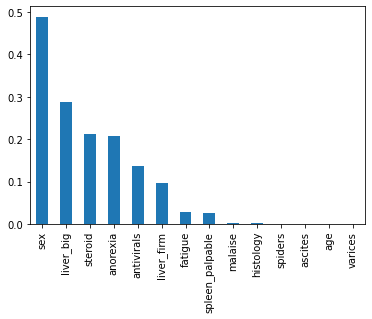

In [291]:

p_values.plot.bar()

Hence these variables contain higher p_value,it is independent to the response hence cannot be implemented to build the model

In [137]:

from scipy import stats

df[['bilirubin', 'albumin']].describe()
ttest,pval = stats.ttest_rel(df['bilirubin'], df['albumin'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


3.66640847644175e-43
reject null hypothesis


In [140]:
#'bilirubin', 'albumin', 'alk_phosphate', 'sgot'
df[['alk_phosphate', 'bilirubin']].describe()
ttest,pval = stats.ttest_rel(df['bilirubin'], df['alk_phosphate'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.669476682424646e-40
reject null hypothesis


In [141]:
df[['alk_phosphate', 'sgot']].describe()
ttest,pval = stats.ttest_rel(df['sgot'], df['alk_phosphate'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.00017748407479578133
reject null hypothesis


In [142]:
df[['albumin', 'sgot']].describe()
ttest,pval = stats.ttest_rel(df['sgot'], df['albumin'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.2463899965659803e-20
reject null hypothesis


hence by the testing of the hypothesis of the continous data we conlude by rejecting the null hypothesis and need to process the model based on the selected variable


In [318]:
data['class'] = data['class'].map({"live" : 1,"die": 0})
X = data.drop(columns =['age', 'sex',  'malaise',
        'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'histology',
       'class'],axis=1)
y = data['class']


In [319]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import precision_recall_curve, confusion_matrix

xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

In [320]:
rf = RandomForestClassifier(random_state = 42)

rf.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [321]:

ypre= rf.predict(xte)

In [322]:

accuracy = accuracy_score(yte, ypre)*100

In [323]:
accuracy

77.41935483870968

Model has an accuracy of 77.41% it has to be further improved. By hyper parameter tuning we can improve our accuary

In [324]:
parameters_optimize = {
                      'max_features': ['auto', 'sqrt', 'log2', None], 
                      'max_depth': [2,3, 4],
                      'criterion': ['gini', 'entropy'],
                      'bootstrap': [True, False],
                      'n_estimators': [2, 5, 10, 15, 20]
                      }

In [325]:
rfsearch = GridSearchCV(rf,
                                   cv = 20,
                                   param_grid = parameters_optimize,
                                   n_jobs = 3)
rfsearch.fit(xtr, ytr);

In [326]:
print('The best param :', rfsearch.best_params_)

The best param : {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'n_estimators': 20}


Let set our best parameters given by the GridSearchCV.

In [327]:
rf.set_params(bootstrap = True, 
                            criterion = 'gini',
                            max_depth = 4,
                            max_features = None,
                            n_estimators = 20);

In [328]:
rf.fit(xtr, ytr);

In [329]:

y_pre = rf.predict(xte)

In [330]:
acc = accuracy_score(yte, y_pre)*100

In [331]:
acc

77.41935483870968

it's not a great improvement, So considering this and the fact that the dataset has many missing data and it contain only 155 samples. So we can go on and analyse other metrics aswell.

In [332]:
conf = confusion_matrix(yte, y_pre)

In [333]:
conf

array([[ 2,  5],
       [ 2, 22]])

In [334]:
yte

81     1
142    1
31     0
29     1
118    0
60     1
93     1
147    0
153    1
68     1
42     1
138    0
78     1
75     1
15     1
19     1
30     0
90     1
117    1
137    1
18     1
12     1
9      1
24     1
69     1
131    0
95     1
45     1
86     0
84     1
126    1
Name: class, dtype: int64

In [341]:

from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
average_precision = average_precision_score(yte, y_pre)

print('recall_score on train set :',recall_score(yte, y_pre))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

recall_score on train set : 0.9166666666666666
Average precision-recall score: 0.81


In [335]:
fpr, tpr, _= roc_curve(yte, y_pre)

In [336]:
auc_val = auc(fpr, tpr)
print(auc_val)

0.6011904761904762


auc_score for (test):  0.738095238095238


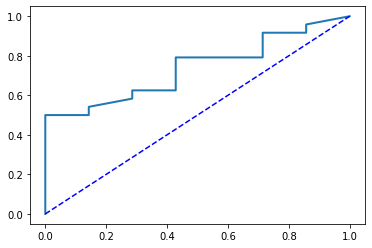

In [339]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
prob=rf.predict_proba(xte)
prob=prob[:,1]
fpr, tpr, thresholds = roc_curve(yte,prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'b--' )
print('auc_score for (test): ', roc_auc_score(yte, prob))
plt.show()

Model doesn't done a good job in distinguishing between both classes as the auc is 0.73. We could improve this issue by adding more data to the model.

CONCLUSION:
We can observe that age, alk_phosphate, bilirubin, malaise, ascites are some of the most important variables for our model. we have seen in EDA and with the testing of the hypothesis we conclude that

So after applying random forest to our dataset, we can conclude that the model was able to predict survival of patients with hepatitis with an accuracy of 77%. This is not the best situaion. However, the moderate good results could be due to the small database and the large number of missing values.